<a href="https://colab.research.google.com/github/GeulHae/GeulHae/blob/dev_dataAnalysis/Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023Y 2Q 가동률 및 정량성과 상반기 실적 & 하반기 추정치 사업 Revision

<br>


<br>





In [27]:
from google.colab import drive
drive.mount('/content/drive')

import os

%cd /content/drive/MyDrive/Revision

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Revision


In [39]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px


In [29]:
df1 = pd.read_csv('KPI.csv')

In [30]:
df2 = pd.read_csv('performance.csv')

In [44]:
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀 명     67 non-null     object 
 1   이름      67 non-null     object 
 2   23.01   20 non-null     float64
 3   23.02   20 non-null     float64
 4   23.03   16 non-null     float64
 5   23.04   19 non-null     float64
 6   23.05   16 non-null     float64
 7   23.06   26 non-null     float64
 8   23.07   40 non-null     float64
 9   23.08   37 non-null     float64
 10  23.09   39 non-null     float64
 11  23.10   36 non-null     float64
 12  23.11   31 non-null     float64
 13  23.12   16 non-null     float64
 14  합계      67 non-null     float64
 15  가동률     67 non-null     object 
dtypes: float64(13), object(3)
memory usage: 8.5+ KB


,팀 명,이름,23.01,23.02,23.03,23.04,23.05,23.06,23.07,23.08,23.09,23.10,23.11,23.12,합계,가동률
0,PM그룹,신윤석,NaN,NaN,NaN,NaN,NaN,1.0,1.00,1.00,1.00,1.00,1.00,1.0,7.00,58%
1,PM그룹,장선주,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.0,12.00,100%
2,PM그룹,장선주,NaN,NaN,NaN,NaN,NaN,0.1,0.10,0.10,0.10,0.10,0.10,0.1,0.70,6%
3,PM그룹,조기훈,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,17%
4,PM그룹,조기훈,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,1.00,NaN,5.00,42%
5,PM그룹,조기훈,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0%
6,PM그룹,조연희,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,0.25,NaN,0.50,5%
7,PM그룹,조연희,NaN,NaN,1.0,1.0,1.0,0.5,0.50,0.50,0.50,0.50,0.50,NaN,6.00,60%
8,PM그룹,조연희,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.25,0.25,0.25,0.20,NaN,1.15,12%
9,PM그룹,조연희,NaN,NaN,NaN,NaN,NaN,NaN,0.05,0.05,0.05,0.05,0.05,0.2,0.45,5%


In [32]:
daf1=df1.fillna(0)

In [33]:
daf1.head()

,팀 명,이름,23.01,23.02,23.03,23.04,23.05,23.06,23.07,23.08,23.09,23.10,23.11,23.12,합계,가동률
0,PM그룹,신윤석,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,58%
1,PM그룹,장선주,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,100%
2,PM그룹,장선주,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.7,6%
3,PM그룹,조기훈,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,17%
4,PM그룹,조기훈,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,42%


# 1. 가동률
### 1) 전체모수(M/M), 가동수(M/M), 비가동수(M/M), Overbooking


In [45]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'AppleGothic') # mac
plt.rc('font', size = 12)
plt.rc('axes', unicode_minus = False) # -표시 오류 잡아줌

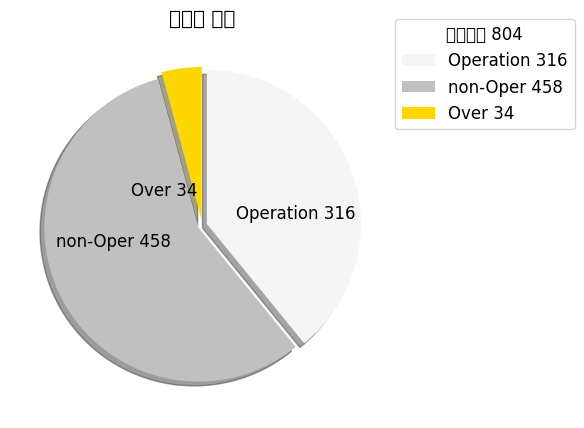

In [65]:
cir = ['Operation 316', 'non-Oper 458', 'Over 34']
mm = [316, 458, 34]
explode = [0.03] * 3
colors = ['whitesmoke', 'silver', 'gold']

plt.figure(figsize = (10, 5))
plt.title('가동률 모수')
plt.pie(mm,
        labels = cir,
        startangle = 90,
        counterclock = False,
        explode = explode,
        shadow = True,
        labeldistance=0.2,
        colors=colors)
plt.legend(loc = (1, 0.75), title = '전체모수 804' )
plt.show()

In [26]:
hap = daf1[['합계', '이름']]
hap_new = hap.groupby('이름').sum()
hap_new

,합계
이름,
김민영,6.90
김윤환,9.00
김재혁,10.40
박성진A,10.50
박성진B,11.50
배준홍,6.00
서명교,11.75
성승연,10.00
신윤석,7.00


### 2) 개인별 가동률
- Max
- Min
- 평균

In [36]:
hap_new['합계'].max()


12.7

In [37]:
hap_new['합계'].min()

1.7999999999999998

In [38]:
hap_new['합계'].mean()

9.184782608695654

- 1 표준편차 범위(μ±1σ)
- 중앙값(Me)
- 최빈값(Mo)

In [ ]:
x = df.loc[:,''] #x축을 시간으로 지정
y = df.loc[:,'x_mean'] #y축에 x,y,z라는 변수를 각각 지정
y1= df.loc[:,'y_mean']
y2= df.loc[:,'z_mean']

# 표준편차 지정
yerr = df.loc[:,'x_sd']
yerr1 = df.loc[:,'y_sd']
yerr2 = df.loc[:,'z_sd']

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   팀명        24 non-null     object
 1   성명        24 non-null     object
 2   총합        24 non-null     object
 3   공헌이익      24 non-null     object
 4   정량성과 집행률  24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB



# 2. 정량성과 집행율
### 개인별 Max, Min / 편차 1 시그마, 중앙값(Me), 최빈값(Mo)  

In [9]:
df2['정량성과 집행률'].median()

TypeError: ignored

In [14]:
df2['정량성과 집행률'].min()

'101%'

In [10]:
df2['정량성과 집행률'].max()

'99%'

In [12]:
df2['정량성과 집행률'].mean()

TypeError: ignored

In [13]:
df2['정량성과 집행률'].std()

TypeError: ignored

In [ ]:
# 사분범위 (Inter Quantile Range , IQR ) :
# 중위수를 기준으로 전체 데이터의 50%가 분포해 있는 범위

df1[''].describe()

In [ ]:
# 층별화 (범주형 항목에 대해 데이터를 나누어 확인)

# NaN : Not A Number / 결측값
# fill_value=  : Pivot Table결과에서 결측값을 다른 값으로 대체

df1.pivot_table(index='', values='', columns='', aggfunc=['mean', 'median', 'min', 'max'], fill_value=0)


# Data Visualization

In [ ]:
# 단일 변수 시각화
# histogram 데이터의 분포를 빈도수로 표현

sns.displot(data=df, x='kpi')
plt.show()